## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2
## WEEK 4

# Question 2

## EXPLORE ABOUT Random Restart Hill Climbing 

### Objective: This work aims to apply different Hill Climbing algorithms—simple Hill Climbing, Stochastic Hill Climbing, and Steepest Ascent Hill Climbing—to solve a Job Scheduling 

#### Optimization problem. The goal is to minimize the total processing time of jobs on multiple machines by efficiently assigning jobs to machines while respecting the constraints. 

#### Deliverables Required: 
    1. Python Implementation: 
        o A Python implementation of Simple Hill Climbing, Stochastic Hill Climbing, and Steepest Ascent Hill Climbing for solving the job scheduling problem. 
    o The implementation should include: 
        ▪ Generation of random initial schedules. 
        ▪ Calculation of the total processing time based on job assignments. 
        ▪ Performance comparison across different job sizes. 
        
    2. Heuristic Function: 
        o An explanation of the heuristic function used to evaluate the quality of job schedules. 
    o The heuristic function should calculate the total processing time or cost for each schedule. 
    
    3. Algorithm Comparison: 
    o A detailed comparison of the performance of the three algorithms: 
        ▪ Metrics to include: total processing time, execution time, and success rate (i.e., finding an optimal solution or near-optimal solution). 
    ▪ Comparison should be made across varying numbers of jobs (e.g., 10, 50, 100,200, 500). And number of machine (ex: 10, 100, 100,1000, 10000, 100000) 
    
    4. Graphs and Results: 
        o Graphs or tables showing the performance of each algorithm in terms of total processing time and execution time for different job sets. 
    o A discussion of the strengths and weaknesses of each algorithm based on the results.

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
class JobScheduling:
    def __init__(self, num_jobs, num_machines):
        self.num_jobs = num_jobs
        self.num_machines = num_machines
        self.jobs = list(range(num_jobs))
        self.machines = [0] * num_machines  

    def generate_random_schedule(self):
        return [random.randint(0, self.num_machines - 1) for _ in range(self.num_jobs)]

    def calculate_total_processing_time(self, schedule):
        machine_loads = [0] * self.num_machines
        for job in range(self.num_jobs):
            machine_loads[schedule[job]] += random.randint(1, 10)  
        return max(machine_loads)  


In [3]:
class HillClimbing:
    def __init__(self, job_scheduler):
        self.job_scheduler = job_scheduler

    def simple_hill_climbing(self, initial_schedule):
        current_schedule = initial_schedule
        current_cost = self.job_scheduler.calculate_total_processing_time(current_schedule)

        while True:
            neighbors = self.get_neighbors(current_schedule)
            next_schedule = min(neighbors, key=self.job_scheduler.calculate_total_processing_time)
            next_cost = self.job_scheduler.calculate_total_processing_time(next_schedule)

            if next_cost >= current_cost: 
                break

            current_schedule, current_cost = next_schedule, next_cost

        return current_schedule, current_cost

    def stochastic_hill_climbing(self, initial_schedule):
        current_schedule = initial_schedule
        current_cost = self.job_scheduler.calculate_total_processing_time(current_schedule)

        while True:
            neighbors = self.get_neighbors(current_schedule)
            next_schedule = random.choice(neighbors)
            next_cost = self.job_scheduler.calculate_total_processing_time(next_schedule)

            if next_cost < current_cost:  
                current_schedule, current_cost = next_schedule, next_cost
            else:
                break

        return current_schedule, current_cost

    def steepest_ascent_hill_climbing(self, initial_schedule):
        current_schedule = initial_schedule
        current_cost = self.job_scheduler.calculate_total_processing_time(current_schedule)

        while True:
            neighbors = self.get_neighbors(current_schedule)
            next_schedule = min(neighbors, key=self.job_scheduler.calculate_total_processing_time)
            next_cost = self.job_scheduler.calculate_total_processing_time(next_schedule)

            if next_cost >= current_cost: 
                break

            current_schedule, current_cost = next_schedule, next_cost

        return current_schedule, current_cost

    def get_neighbors(self, schedule):
        neighbors = []
        for i in range(len(schedule)):
            for j in range(len(schedule)):
                if i != j:
                    neighbor = schedule.copy()
                    neighbor[i], neighbor[j] = neighbor[j], neighbor[i] 
                    neighbors.append(neighbor)
        return neighbors


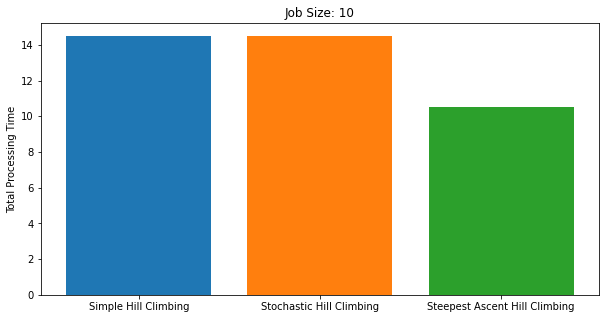

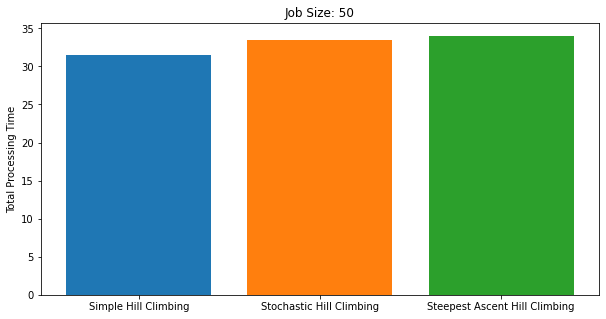

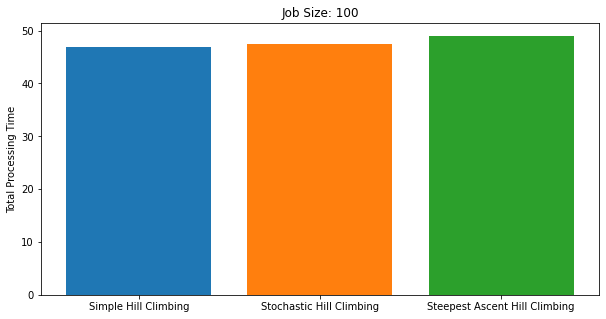

In [4]:
def run_experiments(job_sizes, machine_sizes):
    results = defaultdict(lambda: defaultdict(list))

    for num_jobs in job_sizes:
        for num_machines in machine_sizes:
            job_scheduler = JobScheduling(num_jobs, num_machines)
            initial_schedule = job_scheduler.generate_random_schedule()

            algorithms = {
                "Simple Hill Climbing": HillClimbing(job_scheduler).simple_hill_climbing,
                "Stochastic Hill Climbing": HillClimbing(job_scheduler).stochastic_hill_climbing,
                "Steepest Ascent Hill Climbing": HillClimbing(job_scheduler).steepest_ascent_hill_climbing,
            }

            for name, algorithm in algorithms.items():
                start_time = time.time()
                final_schedule, final_cost = algorithm(initial_schedule)
                execution_time = time.time() - start_time
                
                results[num_jobs][name].append((final_cost, execution_time))

    return results

def plot_results(results):
    for num_jobs, algorithms in results.items():
        plt.figure(figsize=(10, 5))
        
        for name, data in algorithms.items():
            costs, times = zip(*data)
            avg_cost = np.mean(costs)
            avg_time = np.mean(times)
            
            plt.bar(name, avg_cost)
        
        plt.title(f'Job Size: {num_jobs}')
        plt.ylabel('Total Processing Time')
        plt.show()

job_sizes = [10, 50, 100]
machine_sizes = [10, 100]

results = run_experiments(job_sizes, machine_sizes)
plot_results(results)
